# I. Thư Viện


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
cd drive/MyDrive/CNTT/Project_End/

/content/drive/MyDrive/CNTT/Project_End


In [8]:
dt = pd.read_csv("DB.csv")
dt.head(5)

,Ngày,Tháng,Năm,H Muong Te (cm),H NaHu (cm),Q NaHu (m3/s),Q Muong Te (m3/s),Q Polech (m3/s)
0,1,1,1968,28020,33712.0,4.03,219.192937,NaN
1,2,1,1968,28020,33712.0,4.03,219.192937,NaN
2,3,1,1968,28018,33711.0,3.79,214.932084,NaN
3,4,1,1968,28016,33711.0,3.79,210.709483,NaN
4,5,1,1968,28013,33711.0,3.79,204.447305,NaN


# II. Phân tích và Xử lý dữ liệu

## 1. Kiểm tra giá trị null





In [9]:
# Đổi tên các trường trong bảng
dt = dt.rename(columns = {"Ngày":"date" ,"Tháng":"month" ,"Năm":"year" ,"H Muong Te (cm)":"H1" ,"H NaHu (cm)":"H2",
                          "Q NaHu (m3/s)":"Q2","Q Muong Te (m3/s)":"Q1","Q Polech (m3/s)":"Q3"})

In [10]:
# Kiểm tra kiểu dữ liệu trong bảng
dt.dtypes

date       int64
month      int64
year       int64
H1         int64
H2       float64
Q2       float64
Q1       float64
Q3       float64
dtype: object

In [11]:
# Check các giá trị null
dt.isnull().sum()

date         0
month        0
year         0
H1           0
H2           1
Q2           0
Q1           2
Q3       12875
dtype: int64

In [12]:
# Bổ khuyết vào các trị null
# Đối với trường H2
dt["H2"][dt["H2"].isnull()]

13361   NaN
Name: H2, dtype: float64

In [13]:
# Thay thế giá trị ở hàng 13361 bằng trung bình cộng của hàng 13360 và 13362
dt["H2"][13361] = (dt["H2"][13360] + dt["H2"][13362])/2

<ipython-input-13-14418c690678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["H2"][13361] = (dt["H2"][13360] + dt["H2"][13362])/2


In [14]:
# Kiểm tra lại cột H2
dt["H2"].isnull().sum()

0

In [15]:
# Bổ sung giá trị thiếu ở cột Q1
dt["Q1"][dt["Q1"].isnull()]

10686   NaN
10992   NaN
Name: Q1, dtype: float64

In [16]:
dt["Q1"][10686] = (dt["Q1"][10685] + dt["Q1"][10687])/2
dt["Q1"][10992] = (dt["Q1"][10991] + dt["Q1"][10993])/2

<ipython-input-16-e7dd3b26e24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Q1"][10686] = (dt["Q1"][10685] + dt["Q1"][10687])/2
<ipython-input-16-e7dd3b26e24d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Q1"][10992] = (dt["Q1"][10991] + dt["Q1"][10993])/2


In [17]:
# Kiểm tra lại cột Q1
dt["Q1"].isnull().sum()

0

In [18]:
# Kiểm tra giá trị  notnull ở cộ Q3
dt["Q3"][dt["Q3"].notnull()]

12874    308.0000
12875    282.0000
12876    223.0000
12877    197.0000
12878    175.0000
           ...   
15701    399.2570
15702    363.9150
15703    395.6655
15704    334.7515
15705    353.9250
Name: Q3, Length: 2831, dtype: float64

In [19]:
# Giá trị trong tập train ta sẽ lấy từ 12874-15705
# Ta sẽ kiểm tra trong tập train có dữ liệu null không ?
dt["Q3"][12874:15706][dt["Q3"][12874:15706].isnull()]

13226   NaN
Name: Q3, dtype: float64

In [20]:
dt["Q3"][13226]= (dt["Q3"][13225] + dt["Q3"][13227])/2

<ipython-input-20-01b4c0a6fb65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Q3"][13226]= (dt["Q3"][13225] + dt["Q3"][13227])/2


In [21]:
# Kiểm tra lại
dt["Q3"][12874:15706][dt["Q3"][12874:15706].isnull()]

Series([], Name: Q3, dtype: float64)

In [22]:
y = dt["Q3"][12874:15706]

In [23]:
y.isnull().sum()

0

## Khám phá dữ liệu

In [24]:
dtn = dt.dropna()

<Axes: >

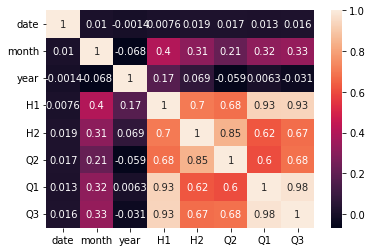

In [25]:
corr = dtn.corr()
sns.heatmap(corr, annot=True)

In [26]:
dt_month = dtn.groupby(["month"]).mean()
dt_month.describe()

,date,year,H1,H2,Q2,Q1,Q3
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,15.720539,2006.624158,28161.738845,33733.251058,16.518276,658.300094,653.049345
std,0.415044,0.224624,145.034236,25.387296,14.340273,531.305707,539.885222
min,14.646465,2006.500000,28003.069124,33707.656566,4.744101,152.360534,146.261210
25%,15.500000,2006.500000,28049.795135,33709.901454,5.872537,245.659563,227.462698
50%,16.000000,2006.500000,28120.332124,33725.556116,9.529215,455.398970,442.355531
75%,16.000000,2006.622475,28259.500235,33749.818750,24.591812,960.025610,934.681498
max,16.000000,2007.000000,28411.411290,33785.227823,49.440726,1661.832125,1673.249710


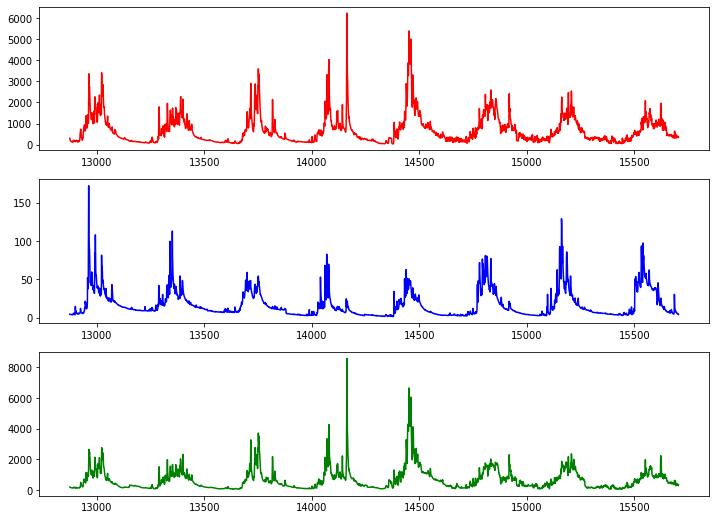

In [27]:
fig, ax = plt.subplots(3,figsize=(12, 9))
ax[0].plot(dtn["Q3"], color="red", label="Polech")
ax[1].plot(dtn["Q2"], color="blue",label="Nà Hừ")
ax[2].plot(dtn["Q1"], color="green")

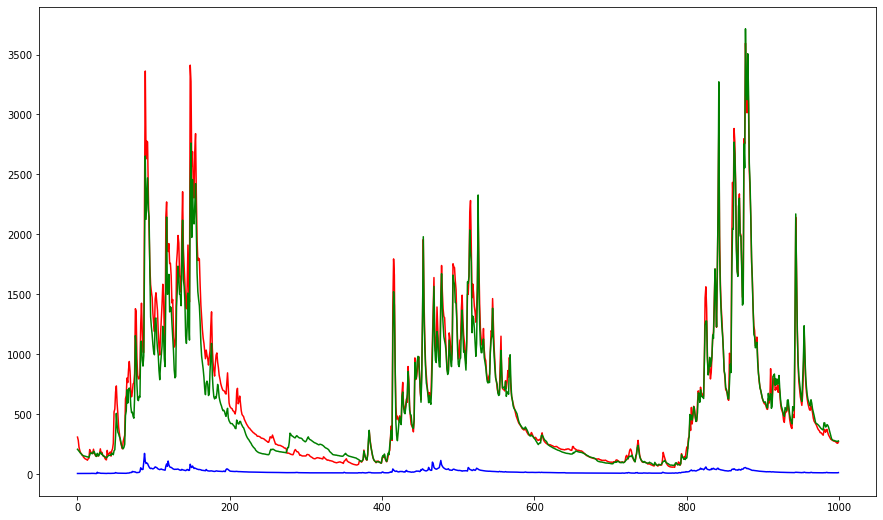

In [28]:
plt.figure(figsize=(15, 9))
plt.plot(range(1000), dtn["Q3"][:1000], color="red", label="Polech")
plt.plot(range(1000), dtn["Q2"][:1000], color="blue",label="Nà Hừ")
plt.plot(range(1000), dtn["Q1"][:1000], color="green") 

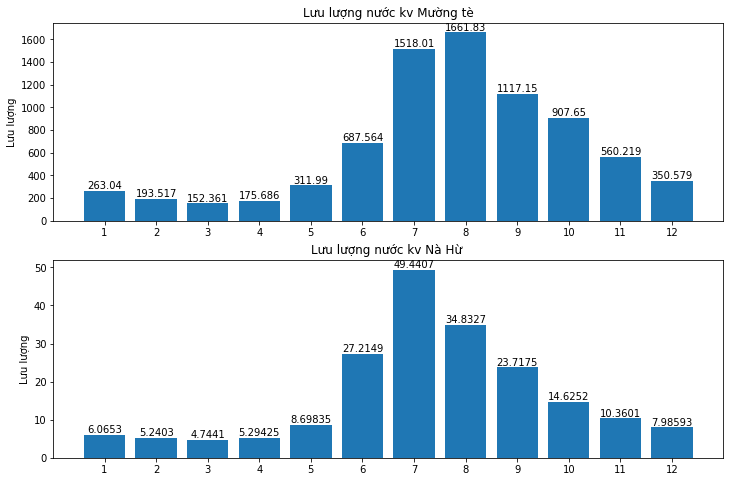

In [29]:
l = [str(i+1) for i in range(12)]
fig, ax = plt.subplots(2,figsize=(12,8))
bar_container0 = ax[0].bar(l, np.array(dt_month["Q1"]))
bar_container1 = ax[1].bar(l, np.array(dt_month["Q2"]))
ax[0].set(ylabel='Lưu lượng', title='Lưu lượng nước kv Mường tè')
ax[0].bar_label(bar_container0, fmt='%g')
# ax[0].plot(np.array(dt_month["H1"]/10))
ax[1].set(ylabel='Lưu lượng', title='Lưu lượng nước kv Nà Hừ ')
ax[1].bar_label(bar_container1, fmt='%g')
plt.show()

## Kiểm tra outlier

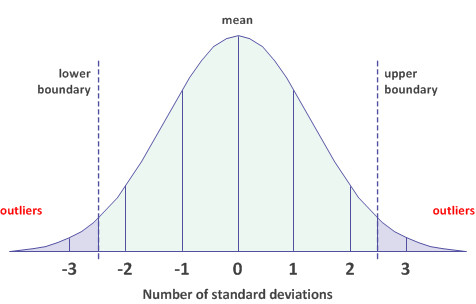

### 1.Kiểm tra mực nước trạm Mường Tè(H1)

In [30]:
dt[dt["H1"]<3000]

,date,month,year,H1,H2,Q2,Q1,Q3
10686,4,4,1997,2800,33704.0,2.92,188.089815,NaN
10992,4,2,1998,2800,33708.0,3.83,182.227132,NaN


In [31]:
# dt["H1"].iloc[10686] = 28000
# dt["H1"].iloc[10992] = 28000

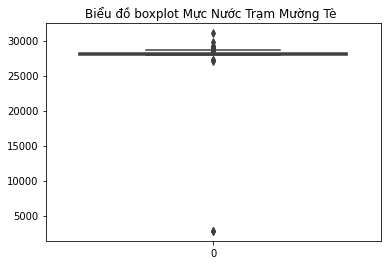

In [32]:
# Kiểm tra mực nước trạm H1
plt.title("Biểu đồ boxplot Mực Nước Trạm Mường Tè ")
sns.boxplot(dt["H1"])
plt.show()

In [33]:
# Lấy dữ liệu trong khoảng mean - 3std --> mean + 3std
mean_h1 = dt["H1"].mean()
std_h1 = dt["H1"].std()
Tmin = mean_h1- (3*std_h1)
Tmax = mean_h1 + (3*std_h1)
dt = dt[dt["H1"] >= Tmin]
dt = dt[dt["H1"] <= Tmax]

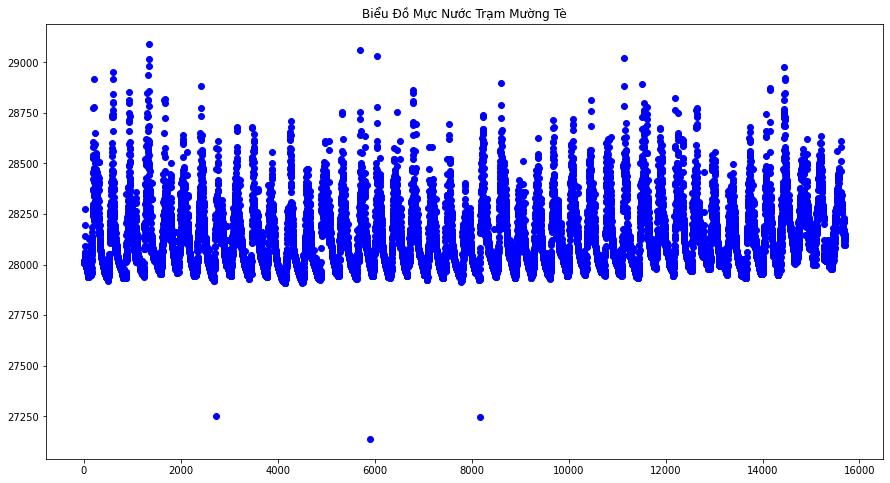

In [34]:
# Hiển thị biểu đồ mực nước trạm mường tè sau khi xử lý outlier
plt.figure(figsize=(15,8))
plt.title("Biểu Đồ Mực Nước Trạm Mường Tè")
plt.scatter(range(len(dt)),dt["H1"], c="blue")
plt.show()

### 2.Kiểm tra mực nước trạm Nà Hừ (H2)

<Axes: title={'center': 'Biểu đồ boxplot mực nước trạm Nà Hừ'}>

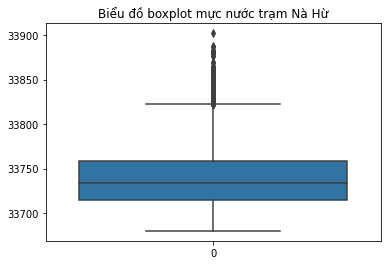

In [35]:
plt.title("Biểu đồ boxplot mực nước trạm Nà Hừ")
sns.boxplot(dt["H2"])

In [36]:
mean_h2 = dt["H2"].mean()
std_h2 = dt["H2"].std()
Tmin_h2 = mean_h2 - (3*std_h2)
Tmax_h2 = mean_h2 + (3*std_h2)
dt = dt[dt["H2"] >= Tmin_h2]
dt = dt[dt["H2"] <= Tmax_h2]

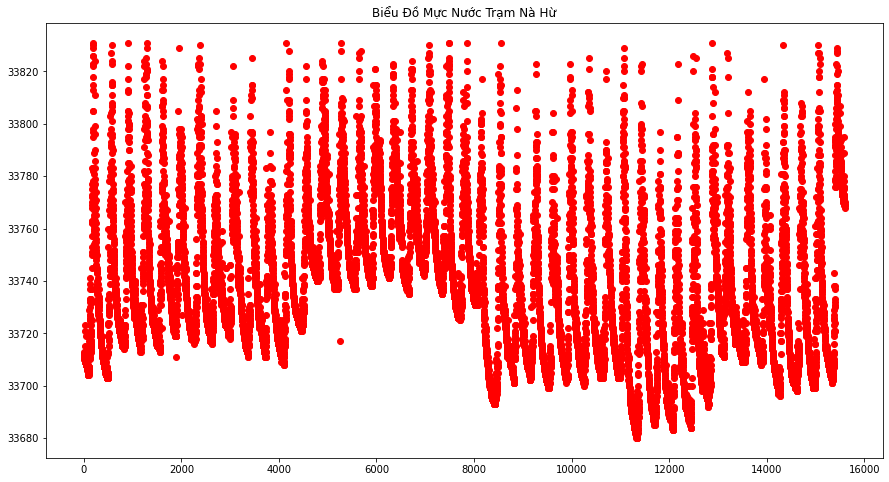

In [37]:
plt.figure(figsize=(15,8))
plt.title("Biểu Đồ Mực Nước Trạm Nà Hừ")
plt.scatter(range(len(dt)),dt["H2"], c="r")
plt.show()

### 3.Kiểm tra lưu lượng trạm Mường Tè(Q1)

<Axes: title={'center': 'Biểu đồ boxplot lưu lượng nước trạm Mường Tè'}>

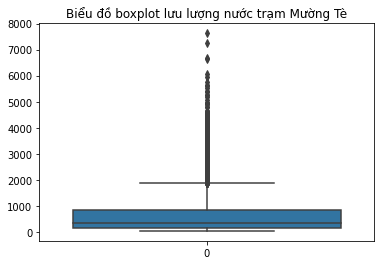

In [38]:
plt.title("Biểu đồ boxplot lưu lượng nước trạm Mường Tè")
sns.boxplot(dt["Q1"])

In [39]:
mean_q1 = dt["Q1"].mean()
std_q1 = dt["Q1"].std()
Tmin_q1 = mean_q1 - (3*std_q1)
Tmax_q1 = mean_q1 + (3*std_q1)
dt = dt[dt["Q1"] >= Tmin_q1]
dt = dt[dt["Q1"] <= Tmax_q1]

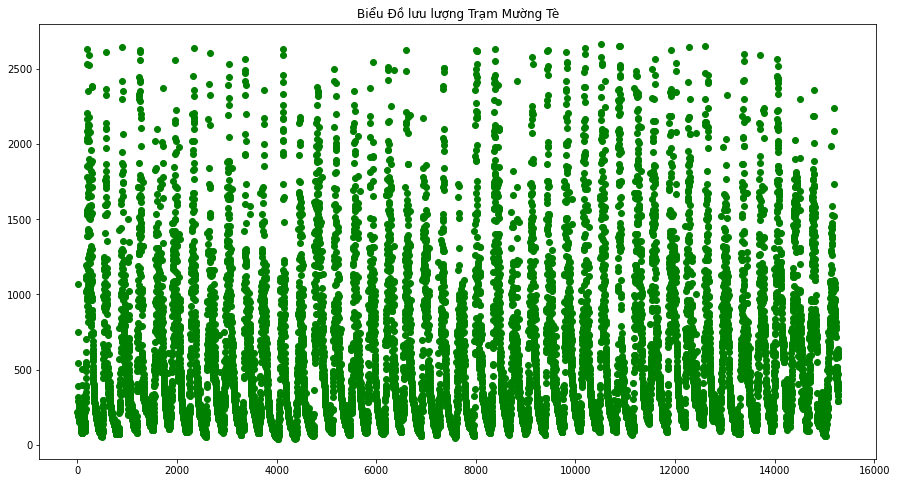

In [40]:
plt.figure(figsize=(15,8))
plt.title("Biểu Đồ lưu lượng Trạm Mường Tè")
plt.scatter(range(len(dt)),dt["Q1"], c="green")
plt.show()

### 4.Kiểm tra lưu lượng trạm Nà Hừ

<Axes: title={'center': 'Biểu đồ boxplot lưu lượng trạm Nà Hừ'}>

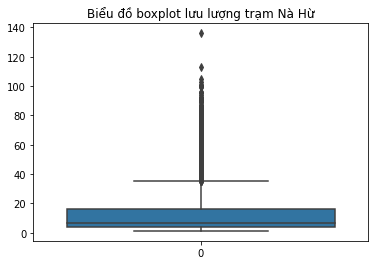

In [41]:
plt.title("Biểu đồ boxplot lưu lượng trạm Nà Hừ")
sns.boxplot(dt["Q2"])

In [42]:
mean_q2 = dt["Q2"].mean()
std_q2 = dt["Q2"].std()
Tmin_q2 = mean_q2 - (3*std_q2)
Tmax_q2 = mean_q2 + (3*std_q2)
dt = dt[dt["Q2"] <= Tmax_q2]
dt = dt[dt["Q2"] >= Tmin_q2]

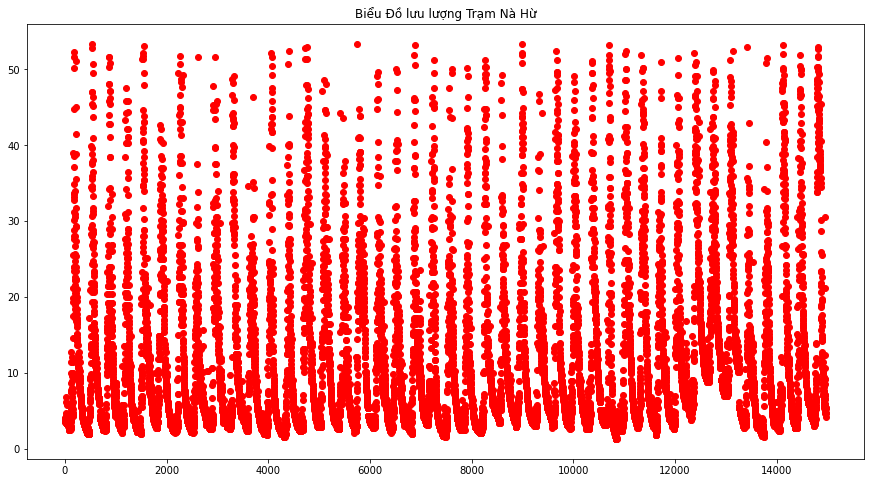

In [43]:
plt.figure(figsize=(15,8))
plt.title("Biểu Đồ lưu lượng Trạm Nà Hừ")
plt.scatter(range(len(dt)),dt["Q2"], c="r")
plt.show()

### 5.Kiểm tra trạm Polech

In [44]:
df_train = dt.dropna()

In [45]:
df_train.index[0]

12874

In [46]:
len(df_train)

2666

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5206b4aa60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5206b4afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5206b4a910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5206b59550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5206b597f0>],
 'means': []}

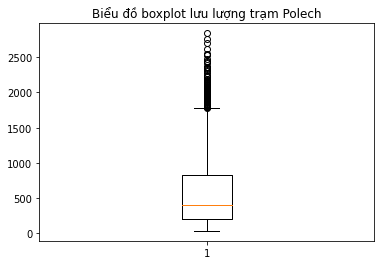

In [47]:
# Trường Q3(Lưu lượng nước trạm Polech)
plt.title("Biểu đồ boxplot lưu lượng trạm Polech")
plt.boxplot(df_train["Q3"])

In [48]:
mean_q3 = df_train["Q3"].mean()
std_q3 = df_train["Q3"].std()
Tmin_q3 = mean_q3 - (3*std_q3)
Tmax_q3 = mean_q3 + (3*std_q3)
df_train = df_train[df_train["Q3"] <= Tmax_q3]
df_train = df_train[df_train["Q3"] >= Tmin_q3]

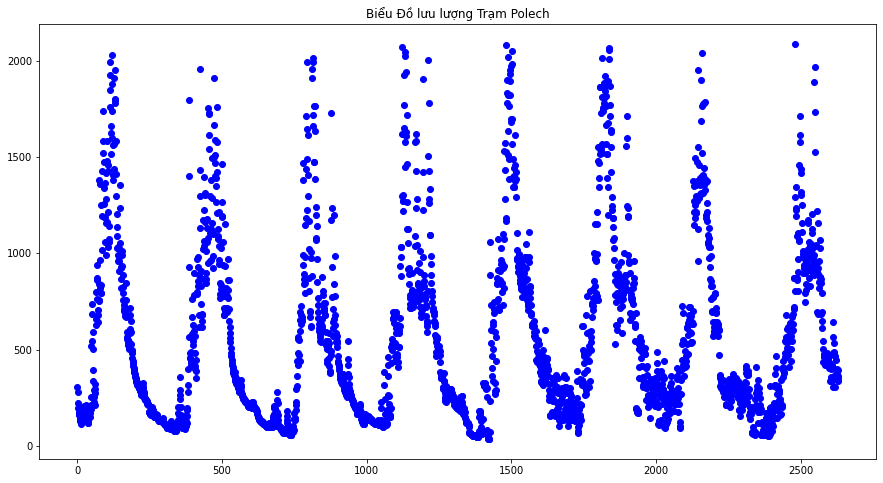

In [49]:
plt.figure(figsize=(15,8))
plt.title("Biểu Đồ lưu lượng Trạm Polech")
plt.scatter(range(len(df_train["Q3"])),df_train["Q3"], c="blue")
plt.show()

In [50]:
len(df_train)

2632

## Đường lũy tích hiệu số

In [51]:
#@title
def luytich(df,titile):
  k = df/(df.mean())
  s = 0
  S = []
  for i in df.index:
    s += (k[i]-1)
    S.append(s)
  plt.title(titile)
  plt.plot(S)
  plt.show()
  return

#### Đường lũy tích hiệu số Q3

In [52]:
#@title
# Xây Dựng Đường lũy tích hiệu số Q3
df_train.head()

,date,month,year,H1,H2,Q2,Q1,Q3
12874,1,4,2003,28014,33695.0,4.50,206.525135,308.0
12875,2,4,2003,28010,33695.0,4.50,198.271196,282.0
12876,3,4,2003,28006,33695.0,4.50,190.170268,223.0
12877,4,4,2003,28002,33694.0,4.27,182.222350,197.0
12878,5,4,2003,27998,33694.0,4.27,174.427443,175.0


In [53]:
#@title
dfn= df_train.groupby("year").mean()
dfn

,date,month,H1,H2,Q2,Q1,Q3
year,,,,,,,
2003,15.573171,8.077236,28115.000000,33731.113821,19.524797,537.565794,682.186992
2004,15.651429,6.488571,28109.194286,33733.298571,17.857429,514.448197,516.093220
2005,15.511628,6.436047,28083.299419,33730.877907,15.532965,456.113830,455.057770
2006,15.822857,6.445714,28119.911429,33726.162857,8.600486,569.414838,536.025857
2007,15.596970,6.421212,28162.078788,33720.324242,9.082424,728.259305,587.645492
2008,15.976119,6.429851,28205.510448,33721.794030,13.515761,637.333796,676.034664
2009,15.732143,6.488095,28171.922619,33724.702381,12.950238,538.353176,536.149439
2010,15.527859,6.489736,28171.334311,33748.835777,15.777185,525.927860,521.433170


In [54]:
#@title
# Loại bỏ dòng 2003 do thiếu dữ liệu
dfn = dfn.drop([2003])

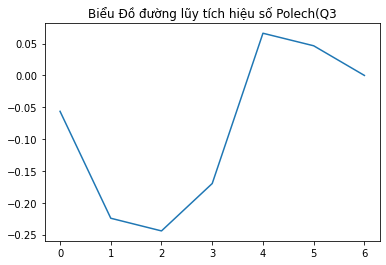

In [55]:
#@title
luytich(dfn["Q3"],"Biểu Đồ đường lũy tích hiệu số Polech(Q3")

In [56]:
#@title


#### Đường lũy tích hiệu số H1

In [57]:
#@title
lt_h1 = dt.groupby("year").mean()

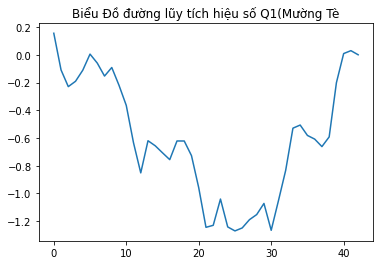

In [58]:
#@title
luytich(lt_h1["Q1"],"Biểu Đồ đường lũy tích hiệu số Q1(Mường Tè")

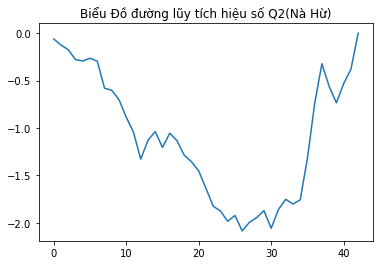

In [59]:
#@title
luytich(lt_h1["Q2"],"Biểu Đồ đường lũy tích hiệu số Q2(Nà Hừ)")

#III. Thuật Toán

In [60]:
y = df_train["Q3"]

In [61]:
df_train = df_train.drop(["Q3"], axis=1)

In [62]:
df_train.head()

,date,month,year,H1,H2,Q2,Q1
12874,1,4,2003,28014,33695.0,4.50,206.525135
12875,2,4,2003,28010,33695.0,4.50,198.271196
12876,3,4,2003,28006,33695.0,4.50,190.170268
12877,4,4,2003,28002,33694.0,4.27,182.222350
12878,5,4,2003,27998,33694.0,4.27,174.427443


In [63]:
df_old = dt[dt["Q3"].isnull()].drop(["Q3"],axis=1)

In [64]:
df_old.head(5)

,date,month,year,H1,H2,Q2,Q1
0,1,1,1968,28020,33712.0,4.03,219.192937
1,2,1,1968,28020,33712.0,4.03,219.192937
2,3,1,1968,28018,33711.0,3.79,214.932084
3,4,1,1968,28016,33711.0,3.79,210.709483
4,5,1,1968,28013,33711.0,3.79,204.447305


In [65]:
len(df_train)

2632

In [66]:
X_ = pd.concat([df_old, df_train,], axis = 0)

## Feature Engineering

In [67]:
X_.head()

,date,month,year,H1,H2,Q2,Q1
0,1,1,1968,28020,33712.0,4.03,219.192937
1,2,1,1968,28020,33712.0,4.03,219.192937
2,3,1,1968,28018,33711.0,3.79,214.932084
3,4,1,1968,28016,33711.0,3.79,210.709483
4,5,1,1968,28013,33711.0,3.79,204.447305


In [68]:
new_month = pd.get_dummies(X_.month, prefix='month')
X = pd.concat([new_month, X_[["H1", "H2", "Q1", "Q2"]]], axis=1)

## Chuẩn hóa dữ liệu

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
X_1 = X[:len(df_old)] # tập dữ liệu từ 1968-2003
X_2 = X[len(df_old):] # tập dữ liệu từ 2003-2010 là tập mang đi trainning 

In [72]:
len(X_2)

2632

In [73]:
len(y)

2632

## Chia tập dữ liệu thành tranning và testing

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y,test_size=0.2,random_state=0)

In [76]:
len(X_train), len(X_test)

(2105, 527)

## Thuật Toán

In [77]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [78]:
def SVM(X_train, X_test, y_train, y_test):
  # svr = SVR(kernel="linear",C=1000, gamma=0.01)
  svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},)
  svr.fit(X_train, y_train)
  y_predict = svr.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  MAE = mean_absolute_error(y_test, y_predict)
  r2 = r2_score(y_test, y_predict)
  RMSE = mean_squared_error(y_test, y_predict,squared=False)

  return y_predict, MSE, r2, MAE, RMSE, svr

def RandomForest(X_train, X_test, y_train, y_test, max_depth):
  regr = RandomForestRegressor(max_depth=max_depth, random_state=0)
  regr.fit(X_train, y_train)
  y_predict = regr.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  MAE = mean_absolute_error(y_test, y_predict)  
  r2 = r2_score(y_test, y_predict)
  RMSE = mean_squared_error(y_test, y_predict,squared=False)

  return y_predict, MSE, r2, MAE, RMSE, regr

def ANN(X_train, X_test, y_train, y_test):
  regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
  y_predict = regr.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  MAE = mean_absolute_error(y_test, y_predict)
  r2 = r2_score(y_test, y_predict)
  RMSE = mean_squared_error(y_test, y_predict,squared=False)
  
  return y_predict, MSE, r2, MAE, RMSE , regr

### 1 SVM

In [79]:
y_predict_svm, MSE_svm, r2_svm, MAE_svm, RMSE_svm, model_svm = SVM(X_train, X_test, y_train, y_test)

In [80]:
print("Kết Quả thuật toán SVM")
print("MSE = " , MSE_svm)
print("RMSE = ", RMSE_svm)
print("MAE = ", MAE_svm)
print("r2 = ", r2_svm)

Kết Quả thuật toán SVM
MSE =  6279.313170339023
RMSE =  79.2421174019159
MAE =  53.405683614156814
r2 =  0.9698650768103245


### 2 Random Forest

In [81]:
# So sanh tham so
l_rd = []
for i in range(1,40,1):
  _, MSE_rd, _, _, _, _ = RandomForest(X_train, X_test, y_train, y_test,i )
  l_rd.append(MSE_rd)


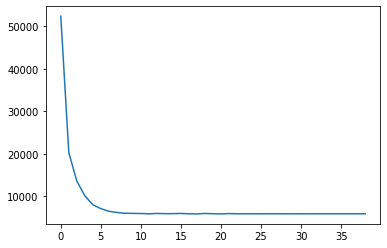

In [82]:
plt.plot(l_rd)

In [83]:
y_predict_rd, MSE_rd, r2_rd, MAE_rd, RMSE_rd, model_rd = RandomForest(X_train, X_test, y_train, y_test,15)

In [84]:
print("Kết Quả thuật toán Random Forest")
print("MSE = " , MSE_rd)
print("RMSE = ", RMSE_rd)
print("MAE = ", MAE_rd)
print("r2 = ", r2_rd)

Kết Quả thuật toán Random Forest
MSE =  5932.040806226821
RMSE =  77.01974296391037
MAE =  50.09847677854067
r2 =  0.9715316644982663


### 3 ANN

In [85]:
y_predict_ann, MSE_ann, r2_ann, MAE_ann, RMSE_ann, model_ann = ANN(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
print("Kết Quả thuật toán ANN")
print("MSE = " , MSE_ann)
print("RMSE = ", RMSE_ann)
print("MAE = ", MAE_ann)

print("r2 = ", r2_ann)

Kết Quả thuật toán ANN
MSE =  6721.134254451494
RMSE =  81.98252407953474
MAE =  59.552666112324175
r2 =  0.9677447422972763


## Model Selection

In [87]:
records = [("Random Forest",MSE_rd, r2_rd, MAE_rd, RMSE_rd), 
           ("ANN",MSE_ann, r2_ann, MAE_ann, RMSE_ann), 
           ("SVM",MSE_svm, r2_svm, MAE_svm, RMSE_svm)]
df = pd.DataFrame(data = records, columns = ["Thuật Toán",'MSE', 'r2', 'MAE',"RMSE"])


In [88]:
df

,Thuật Toán,MSE,r2,MAE,RMSE
0,Random Forest,5932.040806,0.971532,50.098477,77.019743
1,ANN,6721.134254,0.967745,59.552666,81.982524
2,SVM,6279.313170,0.969865,53.405684,79.242117


In [89]:
y_1 = model_rd.predict(X_1)


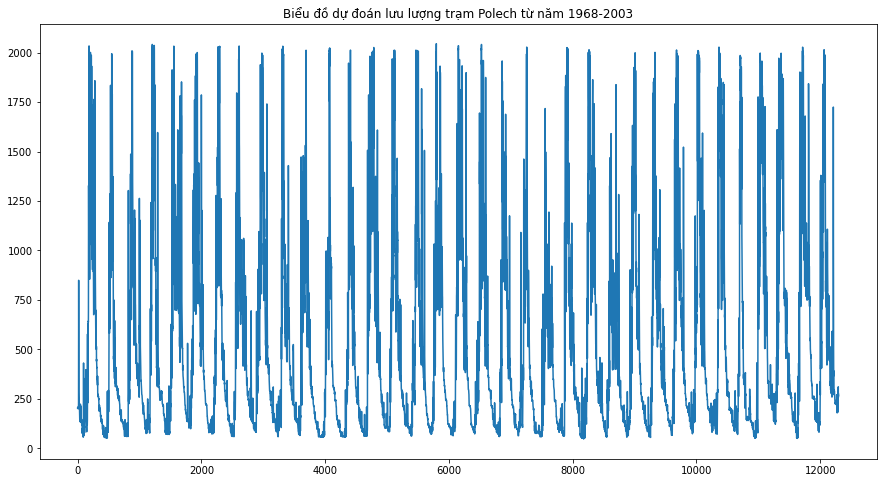

In [90]:
plt.figure(figsize=(15,8))
plt.title("Biểu đồ dự đoán lưu lượng trạm Polech từ năm 1968-2003")
plt.plot(y_1)
plt.show()

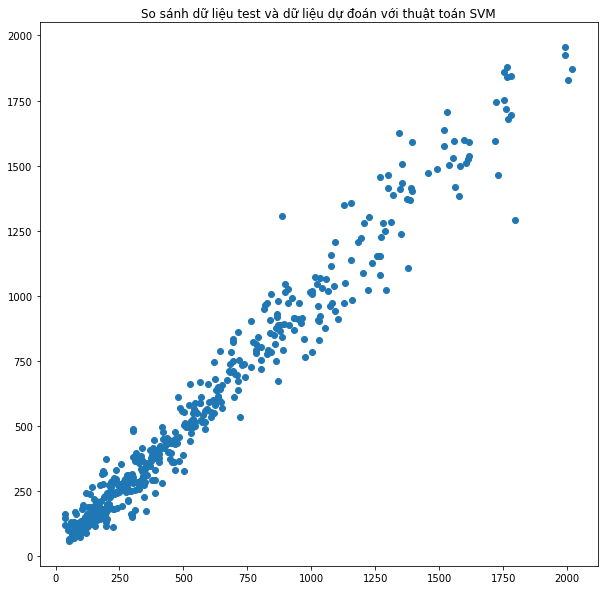

In [91]:
plt.figure(figsize=(10,10))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với thuật toán SVM")
plt.scatter(y_test, y_predict_svm)
plt.show()

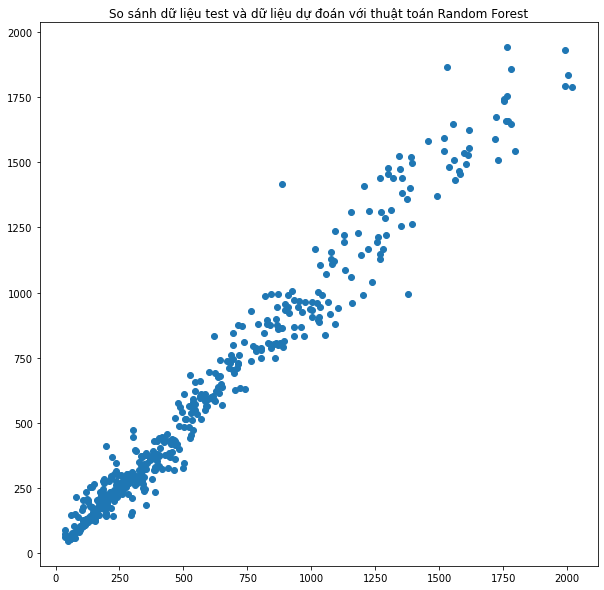

In [92]:
plt.figure(figsize=(10,10))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với thuật toán Random Forest")
plt.scatter(y_test, y_predict_rd)
plt.show()

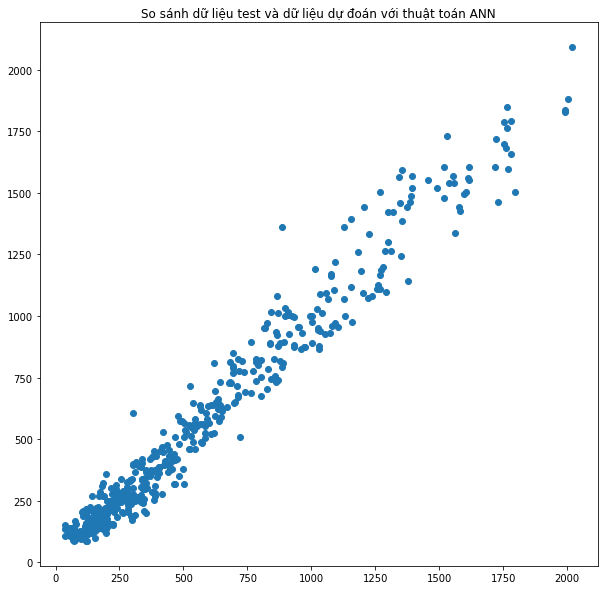

In [93]:
plt.figure(figsize=(10,10))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với thuật toán ANN")
plt.scatter(y_test, y_predict_ann)
plt.show()

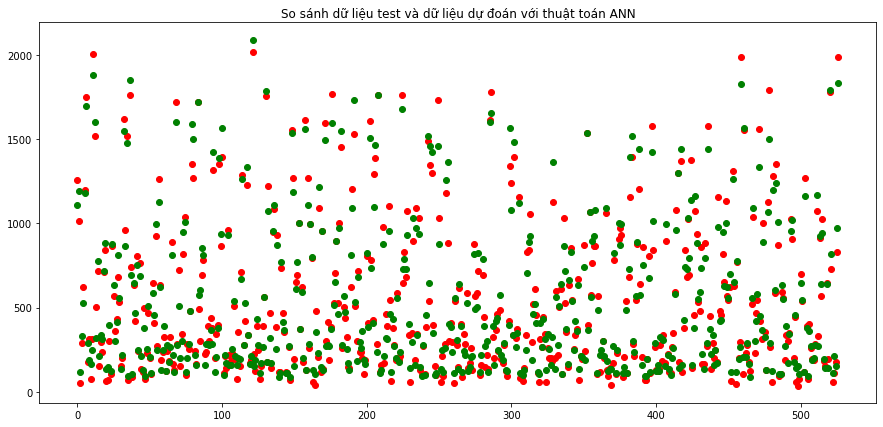

In [94]:
plt.figure(figsize=(15,7))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với thuật toán ANN")
plt.scatter(range(len(y_test)), y_test, color="red", label="y test")
plt.scatter(range(len(y_test)), y_predict_ann, color="green", label="y ds")
# plt.scatter(range(len(y_test)), y_predict_svm, color="blue", label="y tesdt")
# plt.scatter(range(len(y_test)), y_predict_ann, color="orange", label="y tes4t")
plt.show()

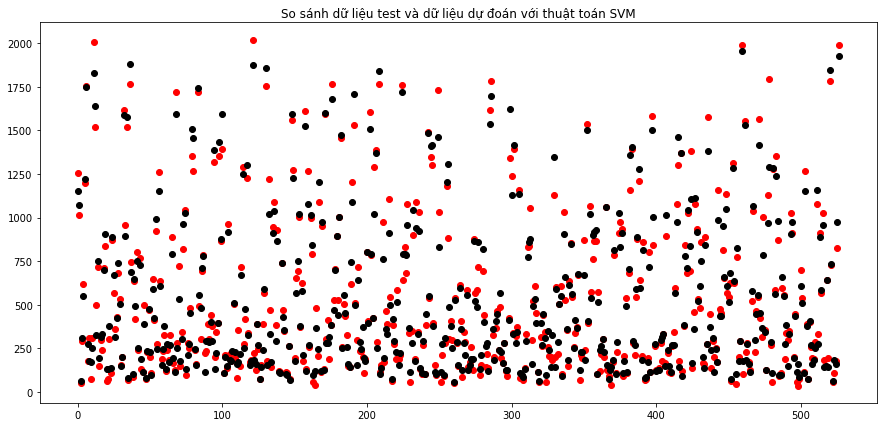

In [95]:
plt.figure(figsize=(15,7))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với thuật toán SVM")
plt.scatter(range(len(y_test)), y_test, color="red", label="y test")
plt.scatter(range(len(y_test)), y_predict_svm, color="black", label="y tes4t")
plt.show()

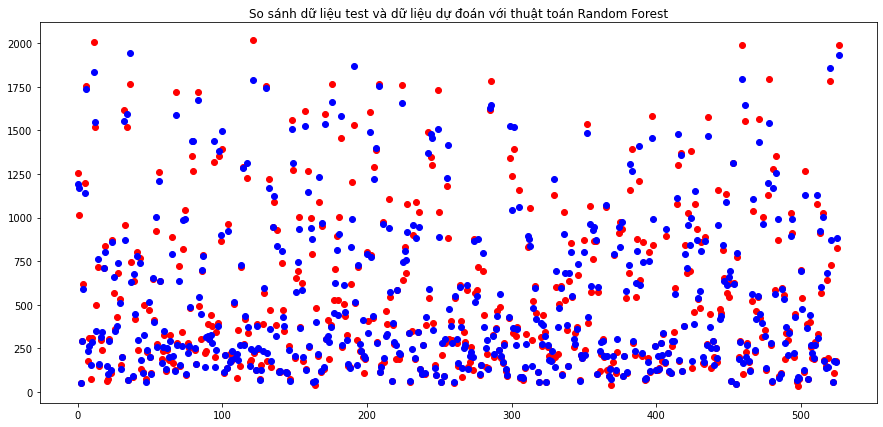

In [96]:
plt.figure(figsize=(15,7))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với thuật toán Random Forest")
plt.scatter(range(len(y_test)), y_test, color="red", label="y test")
plt.scatter(range(len(y_test)), y_predict_rd, color="blue", label="y ds")

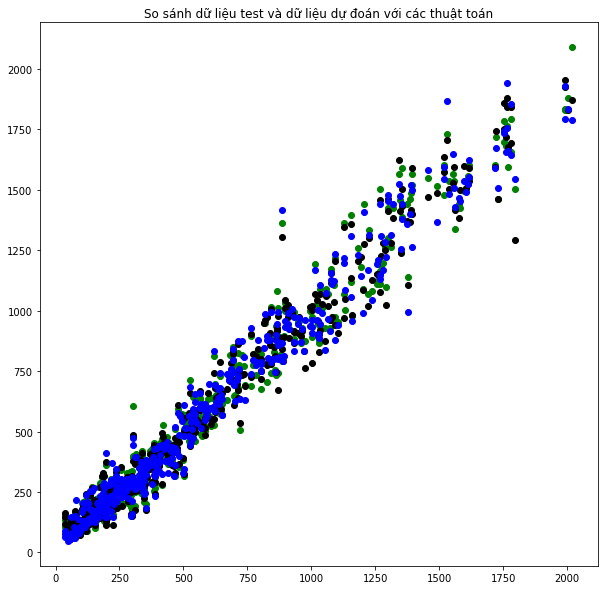

In [97]:
plt.figure(figsize=(10,10))
plt.title("So sánh dữ liệu test và dữ liệu dự đoán với các thuật toán")
plt.scatter(y_test, y_predict_ann, c="green")
plt.scatter(y_test, y_predict_svm,c="black")
plt.scatter(y_test, y_predict_rd, c="blue")
plt.show()

# New Section

# TimeSeries

In [98]:
X_ = X_.reset_index()

In [99]:
X_["Q3_predict"] = pd.concat([pd.Series(y_1), y],ignore_index=True)

In [100]:
ls = X_.groupby(["year","month"],axis=0).mean()

<Axes: xlabel='year,month'>

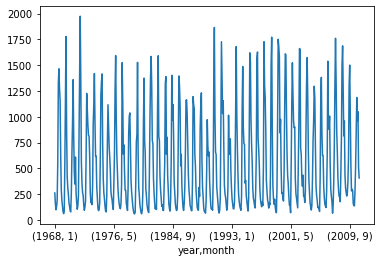

In [101]:
ls["Q3_predict"].plot()

In [102]:
len(ls["Q3_predict"])

516

In [103]:
df = ls.reset_index()
df["date_time"] = pd.to_datetime(dict(year=df.year, month=df.month,day=1))
df = df[["date_time", "Q3_predict"]]
df = df.set_index("date_time")

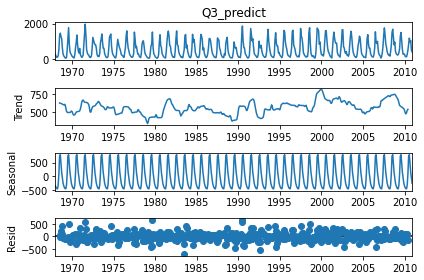

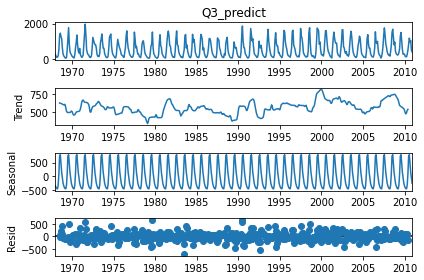

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df["Q3_predict"])
results.plot()

#### Chia tập dữ liệu train/test

In [105]:
size = 504
series = df.reset_index().drop("date_time", axis=1)

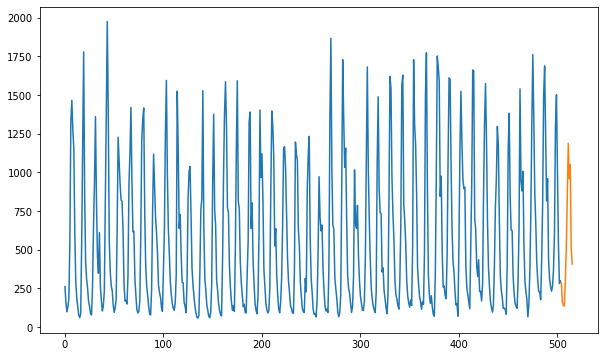

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(range(size),series[:size])
plt.plot(range(size,len(df),1),series[size:])

### ARIMA / SARIMA

In [107]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [109]:
model_1 = pm.auto_arima(ls["Q3_predict"][:size], start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,
                      d=None,
                      seasonal=True,
                      start_P=0,
                      start_Q=10,
                      max_P = 10,
                      max_D=10,
                      max_Q=10,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7126.185, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7631.751, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7231.741, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7259.404, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8076.385, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7005.766, Time=0.81 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=7074.306, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=7006.390, Time=1.22 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7011.579, Time=2.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7113.651, Time=2.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7065.149, Time=0.58 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7185.759, Time=0.76 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 15.533 seconds


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Q3_predict   No. Observations:                  504
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3498.102
Date:                Wed, 08 Mar 2023   AIC                           7006.203
Time:                        09:07:49   BIC                           7027.316
Sample:                             0   HQIC                          7014.485
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        559.3731     15.858     35.274      0.000     528.292     590.454
ar.L1          1.5647      0.036     43.329      0.000       1.494       1.635
ar.L2         -0.8331      0.028    -30.070      0.0

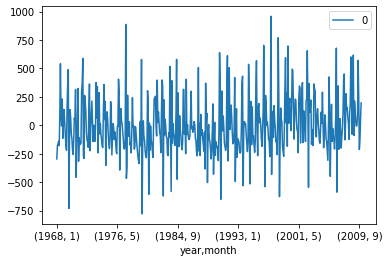

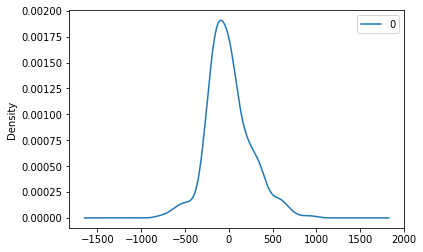

                0
count  504.000000
mean    -0.625315
std    250.148537
min   -778.974141
25%   -156.111077
50%    -33.507749
75%    128.964175
max    958.983591


In [ ]:

model = ARIMA(ls["Q3_predict"][:504], order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test RMSE: 243.886


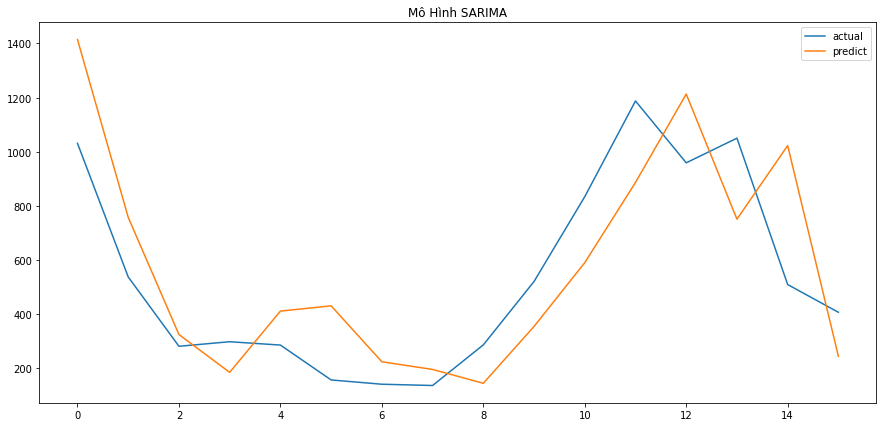

In [ ]:

train, test = np.array(ls["Q3_predict"][0:size]), np.array(ls["Q3_predict"][size:])
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

rmse = np.sqrt(mean_squared_error(test, predictions))
mse_sarima = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(15,7))
plt.title("Mô Hình SARIMA")
plt.plot(test, label="actual")
plt.plot(predictions, label="predict")
plt.legend()
plt.show()

In [ ]:
predictions

[1414.3748234728878,
 757.999119106363,
 325.3558963747145,
 185.81088427273866,
 411.9268182383184,
 431.3304036623096,
 224.85282045779337,
 196.51070127617683,
 145.3917029239148,
 355.29678326685456,
 590.7480714840401,
 886.9563391170809,
 1213.2125443896396,
 751.4197252458132,
 1022.9789112059897,
 245.15849004127523]

### RNN

In [ ]:
import tensorflow as tf

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)



In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
train = series.iloc[:size]
test = series.iloc[size:]
scaler = MinMaxScaler()
scaler.fit(train)
train_scale = scaler.transform(train)
test_scale = scaler.transform(test)

In [ ]:
n_input = 10
n_feature = 1
generator = TimeseriesGenerator(train_scale, train_scale, length=n_input, batch_size=1)

In [ ]:
np.array(test[:12])

array([[1031.26491664],
       [ 537.98008065],
       [ 282.03633333],
       [ 298.83959677],
       [ 286.48387097],
       [ 157.70714286],
       [ 141.91935484],
       [ 137.20511667],
       [ 287.12822581],
       [ 521.21496296],
       [ 834.38857143],
       [1187.75411111]])

In [ ]:
x_train = []
y_train = []
for i in range(len(generator)):
  x_train.append(generator[i][0].reshape(n_input,1))
  y_train.append(generator[i][1][0])

In [ ]:
generator[0]

(array([[[0.10750839],
         [0.05270253],
         [0.0213864 ],
         [0.0382393 ],
         [0.06767518],
         [0.2559829 ],
         [0.66723136],
         [0.73931577],
         [0.63876656],
         [0.57812466]]]), array([[0.2949442]]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [ ]:
# Mô hình mạng RNN
model = Sequential()
model.add(Dense(100,input_shape=[n_input], activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [ ]:
# Mô hình mạng RNN có lớp LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(100,activation="relu", input_shape=(n_input, n_feature)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss="mse")

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               1100      
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(np.array(x_train),np.array(y_train), epochs=10)
loss_per_epoch = model.history.history["loss"]

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.1484
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0124


In [ ]:
model_lstm.fit(generator, epochs=10)
loss_per_epoch_lstm = model_lstm.history.history["loss"]

Epoch 1/10
490/490 [==============================] - 6s 8ms/step - loss: 0.0454
Epoch 2/10
490/490 [==============================] - 4s 9ms/step - loss: 0.0183
Epoch 3/10
490/490 [==============================] - 3s 7ms/step - loss: 0.0148
Epoch 4/10
490/490 [==============================] - 3s 7ms/step - loss: 0.0147
Epoch 5/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0137
Epoch 6/10
490/490 [==============================] - 3s 7ms/step - loss: 0.0134
Epoch 7/10
490/490 [==============================] - 4s 7ms/step - loss: 0.0120
Epoch 8/10
490/490 [==============================] - 4s 9ms/step - loss: 0.0122
Epoch 9/10
490/490 [==============================] - 4s 7ms/step - loss: 0.0118
Epoch 10/10
490/490 [==============================] - 3s 7ms/step - loss: 0.0116


In [ ]:
# import pickle
# # save the model to disk
# filename1 = 'model_rnn.sav'
# filename2 = 'model_lstm.sav'
# pickle.dump(model, open(filename1, 'wb'))
# pickle.dump(model_lstm, open(filename2, 'wb'))

# model = pickle.load(open(filename1, 'rb'))
# model_lstm =pickle.load(open(filename2, 'rb'))

In [ ]:
test.Q3_predict

500    1031.264917
501     537.980081
502     282.036333
503     298.839597
504     286.483871
505     157.707143
506     141.919355
507     137.205117
508     287.128226
509     521.214963
510     834.388571
511    1187.754111
512     959.374433
513    1050.342952
514     509.904900
515     407.505355
Name: Q3_predict, dtype: float64

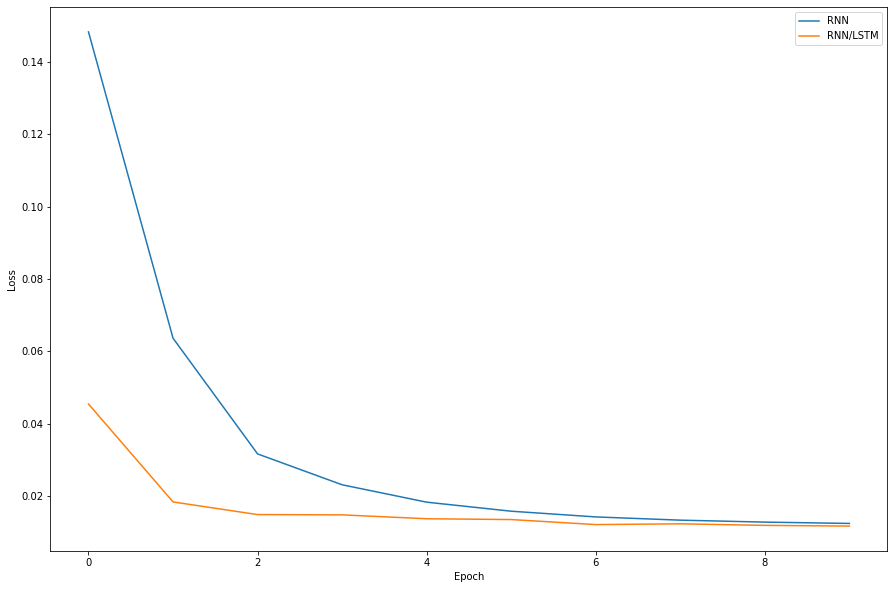

In [ ]:
plt.figure(figsize=(15,10))
plt.title("")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='RNN')
plt.plot(range(len(loss_per_epoch)), loss_per_epoch_lstm, label='RNN/LSTM')
plt.legend()
plt.show()


##### Predict RNN/LSTM

In [ ]:
def Prediction(model):
  test_prediction = []
  firt_val_batch = train_scale[-n_input:]
  current_batch = firt_val_batch.reshape((-1,n_input, n_feature))
  for i in range(len(test_scale)):
    current_pred = model.predict(current_batch)
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[current_pred],axis=1)
  l = [i[0] for i in test_prediction]
  test_prediction = scaler.inverse_transform(l)
  k = [round(i[0],6) for i in test_prediction ]
  test_table = test
  test_table["prediction"] = k
  return test_table

In [ ]:
table_lstm = Prediction(model_lstm)

1/1 [==============================] - 0s 46ms/step


<ipython-input-107-ebade7232bb5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table["prediction"] = k


In [ ]:
table_lstm = table_lstm.reset_index()

In [ ]:
table_lstm.prediction

0     1157.644590
1      840.557683
2      630.717028
3      487.051344
4      384.123086
5      311.470911
6      266.077018
7      258.113553
8      327.580110
9      556.163930
10     969.267964
11    1208.148568
12    1081.962460
13     867.483784
14     681.688224
15     543.604661
Name: prediction, dtype: float64

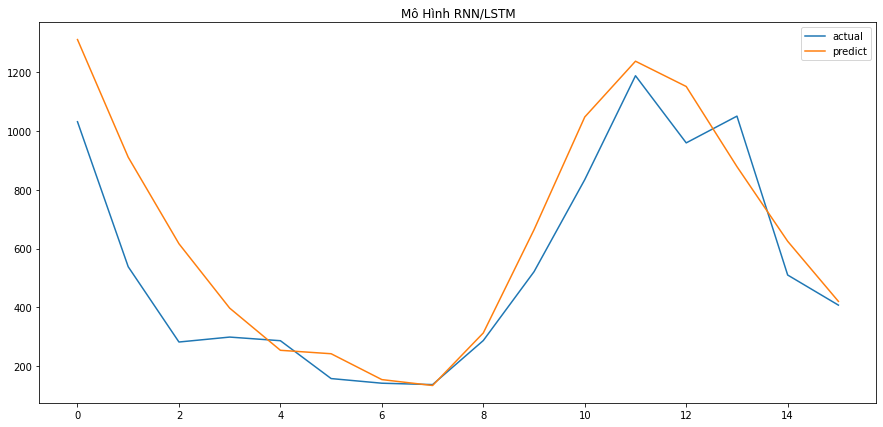

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Mô Hình RNN/LSTM")
plt.plot(table_lstm["Q3_predict"], label="actual")
plt.plot(table_lstm["prediction"], label="predict")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE_LSTM = mean_squared_error(table_lstm["Q3_predict"], table_lstm["prediction"], squared=False)
MSE_LSTM = mean_squared_error(table_lstm["Q3_predict"], table_lstm["prediction"])
RMSE_LSTM

166.9022177362453

##### RNN predict

In [ ]:
table_rnn = Prediction(model)

1/1 [==============================] - 0s 33ms/step


<ipython-input-173-ebade7232bb5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table["prediction"] = k


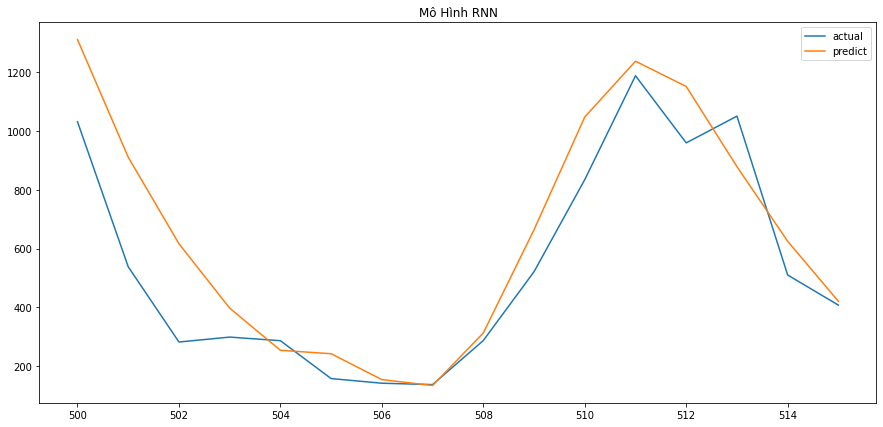

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Mô Hình RNN")
plt.plot(table_rnn["Q3_predict"], label="actual")
plt.plot(table_rnn["prediction"], label="predict")
plt.legend()
plt.show()

In [ ]:
RMSE_RNN = mean_squared_error(table_rnn["Q3_predict"], table_rnn["prediction"], squared=False)
MSE_RNN = mean_squared_error(table_rnn["Q3_predict"], table_rnn["prediction"], )

In [ ]:
records2 = [("RMSE",rmse, RMSE_RNN, RMSE_LSTM),
            ("MSE",mse_sarima, MSE_RNN, MSE_LSTM)]
df = pd.DataFrame(data = records2, columns = ["METRIC","SARIMA",'RNN', 'RNN-LSTM'])
df

,METRIC,SARIMA,RNN,RNN-LSTM
0,RMSE,243.885577,175.938986,166.902218
1,MSE,59480.174428,30954.526941,27856.350285


In [ ]:
# save model
import pickle
filename = 'model_lstm.sav'
pickle.dump(model_lstm, open(filename, 'wb'))


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-07 15:52:31           64
variables.h5                                   2023-03-07 15:52:31       510376
config.json                                    2023-03-07 15:52:31         1798


In [ ]:
model_end =pickle.load(open('model_lstm.sav', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-07 15:52:30           64
variables.h5                                   2023-03-07 15:52:30       510376
config.json                                    2023-03-07 15:52:30         1798
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [ ]:
test_scale[-n_input:]

array([[0.04333511],
       [0.04085579],
       [0.11970344],
       [0.24281447],
       [0.40751892],
       [0.59336113],
       [0.47325156],
       [0.52109377],
       [0.23686628],
       [0.18301225]])

In [ ]:
def Predict_end(model,year):
  if year <= 2010:
    return "Dự đoán từ năm 2011"
  else:
    month = (year - 2010)*12
    prediction = []
    firt_val_batch = test_scale[-n_input:]
    current_batch = firt_val_batch.reshape((-1,n_input, n_feature))
    for i in range(month):
      current_pred = model.predict(current_batch)
      prediction.append(current_pred)
      current_batch = np.append(current_batch[:,1:,:],[current_pred],axis=1)
    l = [i[0] for i in prediction]
    prediction = scaler.inverse_transform(l)
    k = [round(i[0],6) for i in prediction ]
    return k

In [ ]:
 k = Predict_end(model_end, 2011)

1/1 [==============================] - 0s 26ms/step


In [ ]:
k_tenyear = Predict_end(model_end, 2024)

1/1 [==============================] - 0s 25ms/step


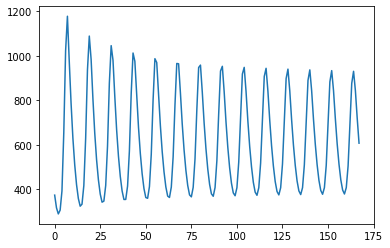

In [ ]:
plt.plot(k_tenyear)

In [ ]:
pd.DataFrame(np.array(k_tenyear)).to_csv("predict_all.csv")

In [ ]:
import json  
 
predict_all_lst = json.dumps(k_tenyear)  